In [12]:
import pandas

In [13]:
from sklearn.metrics import cohen_kappa_score

In [22]:
annotator2o = pandas.read_excel("Anon2Evaluationord.xlsx", sheet_name=None)
annotator1o = pandas.read_excel("Anon1Evaluation_semanticord.xlsx", sheet_name=None)

In [24]:
cohen_kappa_scoreso = dict()
semanticscores = dict()
for el in annotator1o.keys():
    print(el)
    values1o = annotator1o[el]["valid"][0:100]
    valuesforavg1 = [float(val) for val in values1o if val != -1]
    semanticscores[el] = dict()
    semanticscores[el]["a1"] = mean(valuesforavg1)
    values2o = annotator2o[el]["valid"][0:100]
    valuesforavg2 = [float(val) for val in values2o if val != -1]
    semanticscores[el]["a2"] = mean(valuesforavg2)
    indextoremove1 = {i for i, x in enumerate(values1o) if x == -1}
    indextoremove2 = {i for i, x in enumerate(values2o) if x == -1}
    remove = indextoremove1.union(indextoremove2)
    values1o = [val*10 for i, val in enumerate(values1o) if i not in remove] 
    values2o = [val*10 for i, val in enumerate(values2o) if i not in remove]
    count = 0
    print(set(values1o))
    print(set(values2o))
    score = cohen_kappa_score(values1o, values2o, weights="quadratic")
    print(score)
    cohen_kappa_scoreso[el] = score

semantic_validity_arco
{0.0, 10.0, 5.0}
{0.0, 10.0, 5.0}
0.7777076097252921
semantic_validity_zeri
{10.0, 5.0}
{10.0, 5.0}
0.6621621621621622
semantic_validity_nomisma
{10.0, 5.0}
{10.0, 5.0}
1.0
semantic_validity_wikidata
{0.0, 10.0, 5.0}
{0.0, 10.0, 5.0}
0.7624489795918368
semantic_validity_sari
{0.0, 10.0, 5.0}
{0.0, 10.0}
0.7835410026079397
semantic_validity_dbpedia
{0.0, 10.0}
{0.0, 10.0}
0.8896734333627537
semantic_validity_europeana
{0.0, 10.0, 5.0}
{0.0, 10.0, 5.0}
0.8240893282079443
semantic_validity_yago
{0, 10}
{0.0, 10.0}
1.0
semantic_validity_nd_hungary
{0, 10}
{0.0, 10.0}
0.823321554770318


In [26]:
semanticscores

{'semantic_validity_arco': {'a1': 0.8806818181818182, 'a2': 0.775},
 'semantic_validity_zeri': {'a1': 0.995, 'a2': 0.99},
 'semantic_validity_nomisma': {'a1': 0.995, 'a2': 0.995},
 'semantic_validity_wikidata': {'a1': 0.9845360824742269,
  'a2': 0.9690721649484536},
 'semantic_validity_sari': {'a1': 0.8313253012048193,
  'a2': 0.8666666666666667},
 'semantic_validity_dbpedia': {'a1': 0.63, 'a2': 0.68},
 'semantic_validity_europeana': {'a1': 0.478494623655914,
  'a2': 0.45918367346938777},
 'semantic_validity_yago': {'a1': 0.99, 'a2': 0.99},
 'semantic_validity_nd_hungary': {'a1': 0.14, 'a2': 0.12}}

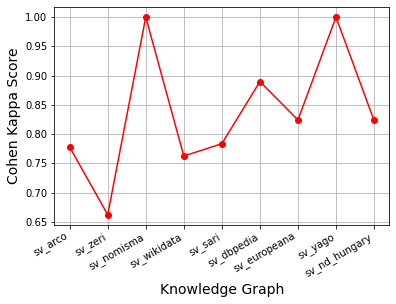

In [28]:
import matplotlib.pyplot as plt
import numpy as np
   
names = list(cohen_kappa_scoreso.keys())
names = [name.replace("semantic_validity", "sv") for name in names]
scores = list(cohen_kappa_scoreso.values())

plt.plot(names, scores, color='red', marker='o')
ax = plt.subplot()
plt.xlabel('Knowledge Graph', fontsize=14)
plt.ylabel('Cohen Kappa Score', fontsize=14)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.grid(True)
plt.show()